 ## Ejercicio 4: 
Configure el SOM para ser utilizado como clasificador de patrones y realice pruebas con la base de datos clouds



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
rng = np.random.default_rng()

In [2]:
def generar_particiones(filename, n, p_test):
    ds = np.genfromtxt(filename, delimiter=',')
    n_test = int(ds.shape[0] * p_test)
    n_train = ds.shape[0] - n_test
    M_test = np.zeros((n,n_test),dtype = int)
    M_train = np.zeros((n, n_train),dtype = int)

    for i in range(n):
        idx=np.random.choice(range(ds.shape[0]),ds.shape[0],replace = False)
        idx_test = idx[0:n_test]
        idx_train = idx[n_test:ds.shape[0]]
        M_test[i] = idx_test
        M_train[i] = idx_train
    
    return (ds, M_test, M_train)

In [46]:
ds, testPartitionsIdx, trainPartitionsIdx  =  generar_particiones('gtp2datos/clouds.csv', 1, 0.2)
NInputs = 2

# Cantidad de patrones para entrenamiento
NPatternsTrain = trainPartitionsIdx.shape[1]

# Generar el vector de entradas para entrenamiento (solo una partición)
X = ds[trainPartitionsIdx[0], :-1]
Y = ds[trainPartitionsIdx[0],-1]

X_tst = ds[testPartitionsIdx[0], :-1]
Yd_tst = ds[testPartitionsIdx[0],-1]

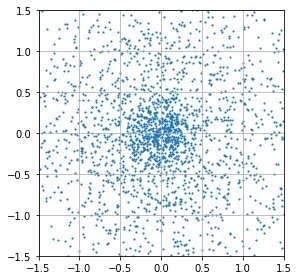

In [37]:

anim_fig = plt.figure(figsize=(5, 4), tight_layout=True)
# anim_fig.suptitle('Evolución de la recta $w_1 x + w_2 y - w_0 = 0$',  fontsize=11)
anim_ax = anim_fig.add_subplot(autoscale_on=False, xlim=(-1.5, 1.5), ylim=(-1.5, 1.5))
anim_ax.set_aspect('equal')
anim_ax.grid()
x_x = X[:,0]
x_y = X[:,1]
anim_ax.scatter(x_x, x_y, c='C0', s=5, marker='.')
plt.show()

In [19]:
# el mapa es un arreglo cuyos componentes representan las neuronas numeradas fila a fila

nRows = 3                                           # cantidad de filas
nCols = 3                                          # cantidad de columnas
# radio de activación
actRatio = 2    
nepoc=200
learningRate = 0.7

# inicialización de pesos [habría que hacerlo entre -0.5 y 0.5?]
som = rng.random((nRows * nCols, NInputs))
print(som)

[[0.63150299 0.60905453]
 [0.17232387 0.80442584]
 [0.31846489 0.33628835]
 [0.98782683 0.92787132]
 [0.64680096 0.88983556]
 [0.36509423 0.2123082 ]
 [0.04832108 0.12902622]
 [0.34132955 0.39881663]
 [0.67147646 0.38690613]]


In [20]:
som_history = []
for i in range (nepoc):
    for pattern in X:
        
        #búsqueda de la neurona ganadora
        actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))
        #buscar en qué fila cae la neurona
        idxRow = 0; cRow = 0
        for i in range(0, len(som), nCols):
            if actN in range(i, i+nCols):
                idxRow = cRow
                break
            else:
                cRow += 1

        # Adaptación de pesos
        # wj(n) + η(n) (x(n) − wj(n)) de radio de vecindad

        # en la fila de la neurona activa
        # print('neuronas activadas:')
        minIdx = idxRow*nCols
        maxIdx = idxRow*nCols + nCols
        som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] = \
            som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] + \
                learningRate * (pattern - som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)])
        # print(f'fila 0, ({np.clip(actN - actRatio, idxRow*nCols, idxRow*nCols +nCols)}:{np.clip(actN + actRatio + 1, idxRow*nCols, idxRow*nCols + nCols)}]')

        # en las filas hacia arriba y abajo de la neurona activa
        for i in range(1, actRatio + 1):
            # si la fila anterior existe, su índice no es negativo
            if idxRow - i > -1:
                
                minIdx = (idxRow - i) * nCols
                maxIdx = (idxRow - i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN - (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN - (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila - {i}, ({idxIni}:{idxFin}]')
                # actualizo los pesos de la neurona
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
                # si la fila a siguiente existe, el índice es menor que la cantidad de cols del mapa
            if idxRow + i < nRows:
                minIdx = (idxRow + i) * nCols
                maxIdx = (idxRow + i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN + (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN + (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila + {i}, ({actN + (i * nCols) - (actRatio - i)}:{actN + (i * nCols) + (actRatio - i) + 1}]')
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])

In [21]:

# radio de activación
actRatio = 0    
nepoc=500
learningRate = 1e-3

In [22]:
for i in range (nepoc):
    for pattern in X:
        
        #búsqueda de la neurona ganadora
        actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))

        #buscar en qué fila cae la neurona
        idxRow = 0; cRow = 0
        for i in range(0, len(som), nCols):
            if actN in range(i, i+nCols):
                idxRow = cRow
                break
            else:
                cRow += 1

        # Adaptación de pesos
        # wj(n) + η(n) (x(n) − wj(n)) de radio de vecindad

        # en la fila de la neurona activa
        # print('neuronas activadas:')
        minIdx = idxRow*nCols
        maxIdx = idxRow*nCols + nCols
        som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] = \
            som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)] + \
                learningRate * (pattern - som[np.clip(actN - actRatio, minIdx, maxIdx) : np.clip(actN + actRatio + 1, minIdx, maxIdx)])
        # print(f'fila 0, ({np.clip(actN - actRatio, idxRow*nCols, idxRow*nCols +nCols)}:{np.clip(actN + actRatio + 1, idxRow*nCols, idxRow*nCols + nCols)}]')

        # en las filas hacia arriba y abajo de la neurona activa
        for i in range(1, actRatio + 1):
            # si la fila anterior existe, su índice no es negativo
            if idxRow - i > -1:
                
                minIdx = (idxRow - i) * nCols
                maxIdx = (idxRow - i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN - (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN - (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila - {i}, ({idxIni}:{idxFin}]')
                # actualizo los pesos de la neurona
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])
                # si la fila a siguiente existe, el índice es menor que la cantidad de cols del mapa
            if idxRow + i < nRows:
                minIdx = (idxRow + i) * nCols
                maxIdx = (idxRow + i) * nCols + nCols
                # print(f'rango de indices: {minIdx}-{maxIdx}')
                # clampeo los valores para que se encuentren dentro del rango de índices de la fila
                idxIni = np.clip(actN + (i * nCols) - (actRatio - i), minIdx, maxIdx)
                idxFin = np.clip(actN + (i * nCols) + (actRatio - i) + 1, minIdx, maxIdx)
                # print(f'fila + {i}, ({actN + (i * nCols) - (actRatio - i)}:{actN + (i * nCols) + (actRatio - i) + 1}]')
                som[idxIni : idxFin] = som[idxIni : idxFin] + learningRate * (pattern - som[idxIni : idxFin])

In [32]:
a=1
a+=1
print(a)

2


In [45]:
activation_counter = np.zeros((som.shape[0],som.shape[1]))
for pattern,label in zip(X,Y):
    actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))
    if(label==0):
        activation_counter[actN][0] += 1 
    else:
        activation_counter[actN][1] += 1

neuron_class=np.zeros(som.shape[0])
for i in range(som.shape[0]):
    neuron_class[i]=1 if (activation_counter[i][1]>activation_counter[i][0]) else 0


In [55]:
y_tst=np.zeros(Yd_tst.shape[0])
error_rate=0
for i,(pattern,yd_tst) in enumerate(zip(X_tst,Yd_tst)):
    actN = np.argmin(np.linalg.norm(pattern - som, 1, axis = 1))
    y_tst[i] = neuron_class[actN]
    if (neuron_class[actN]!=yd_tst):
        error_rate +=1

print(error_rate)



182
